<a href="https://colab.research.google.com/github/12tilak34/Fintechstartup/blob/main/exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install yfinance

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets
Y = data[assets].pct_change().dropna()

display(Y.head())

[*********************100%%**********************]  25 of 25 completed


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1729%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9144%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6058%,-2.5394%,...,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0216%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0331%,...,1.6436%,0.0000%,0.9870%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


In [16]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5019%,0.0000%,0.0000%,8.4808%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8264%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2738%,0.0000%


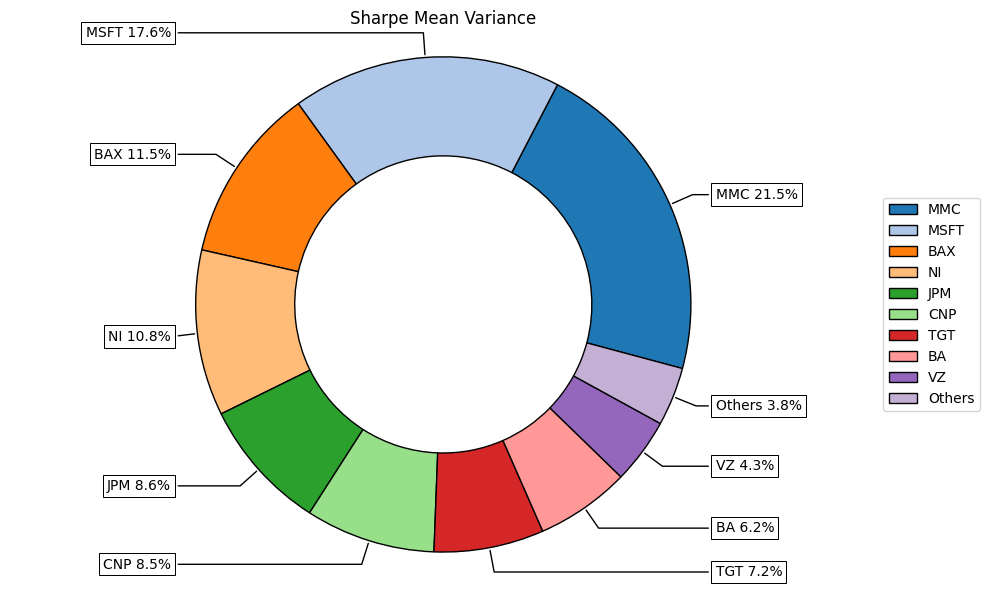

In [17]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [18]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())


,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9907%,3.2270%,0.0741%,0.0000%,2.8446%,...,11.4529%,0.0000%,14.9247%,0.1681%,6.5904%,4.0899%,0.0000%,0.0000%,8.2765%,0.0000%
1,0.0000%,2.0125%,8.4903%,0.7981%,1.6844%,8.5601%,2.1529%,1.3613%,0.0000%,1.0444%,...,13.4496%,0.0000%,9.2100%,0.0000%,5.5817%,5.5235%,0.0000%,0.0000%,8.7588%,0.0000%
2,0.0000%,2.8164%,9.3711%,0.0000%,1.1980%,9.1478%,1.7065%,1.7396%,0.0000%,0.0871%,...,14.2327%,0.0000%,6.4848%,0.0000%,5.1004%,6.0539%,0.0000%,0.0000%,9.0037%,0.0000%
3,0.0000%,3.4305%,9.9329%,0.0000%,0.5693%,9.5580%,1.0811%,1.9316%,0.0000%,0.0000%,...,14.7707%,0.0000%,3.6630%,0.0000%,4.2580%,6.4249%,0.0000%,0.0000%,9.2129%,0.0000%
4,0.0000%,3.9342%,10.3865%,0.0000%,0.0003%,9.8876%,0.3998%,2.0811%,0.0000%,0.0000%,...,15.1319%,0.0000%,1.0859%,0.0000%,3.3465%,6.7109%,0.0000%,0.0000%,9.2762%,0.0000%


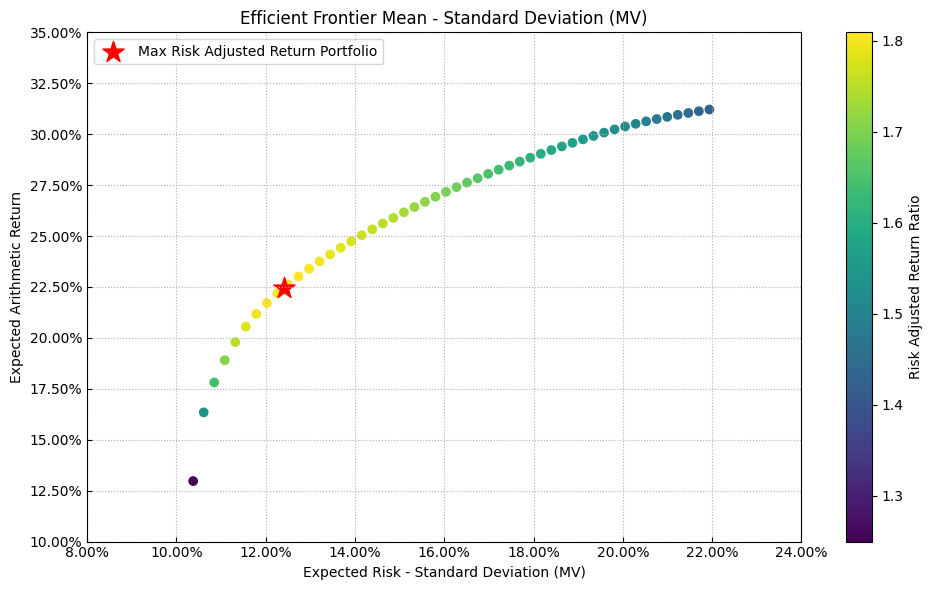

In [19]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


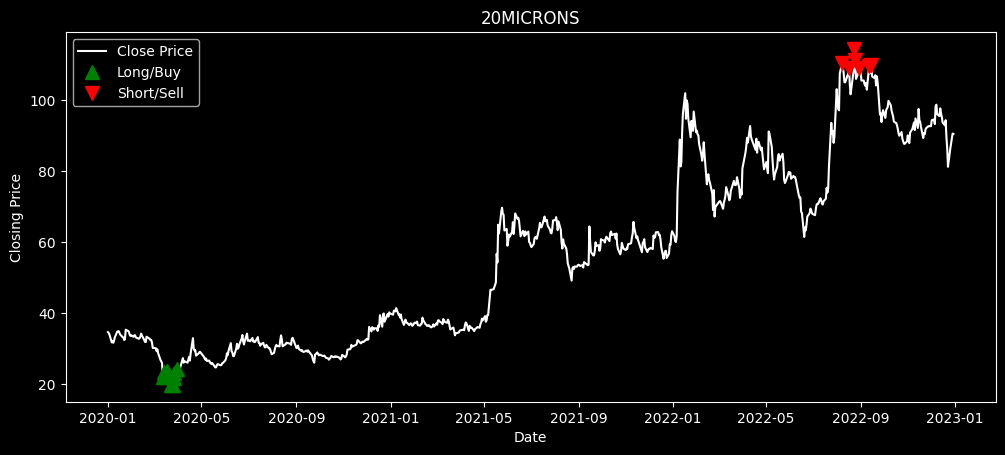

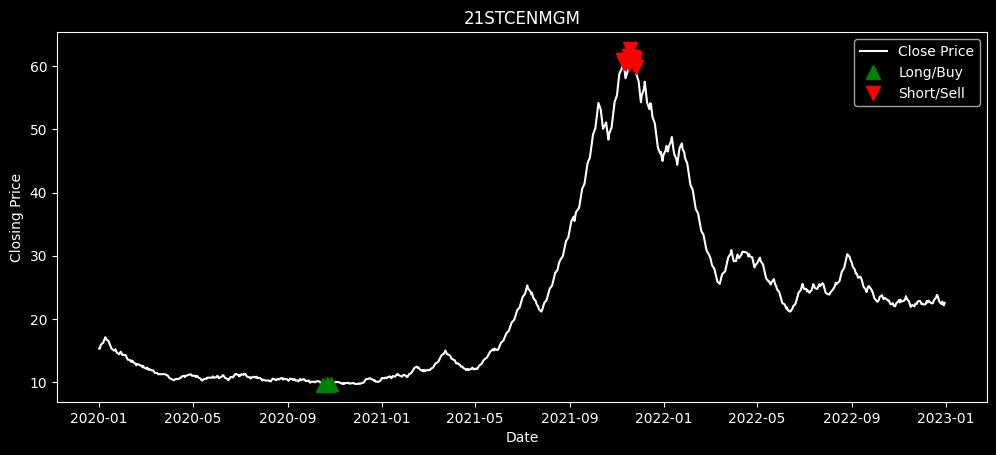

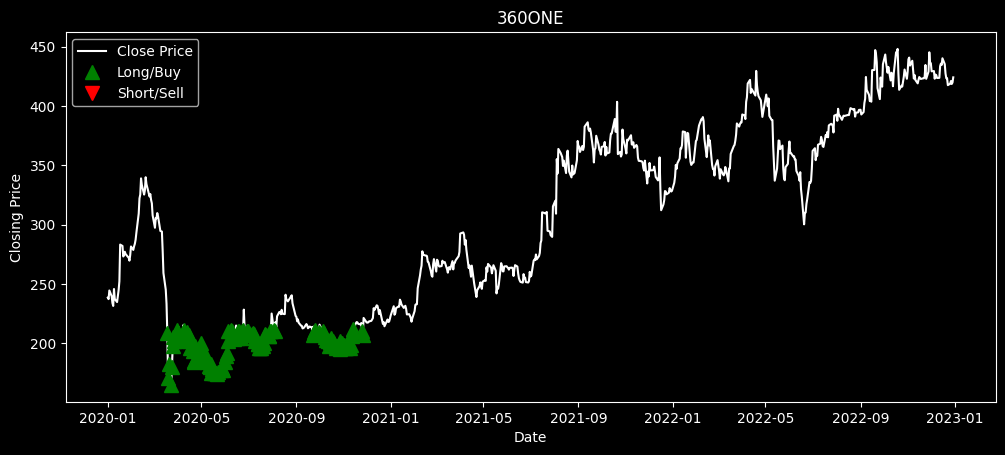

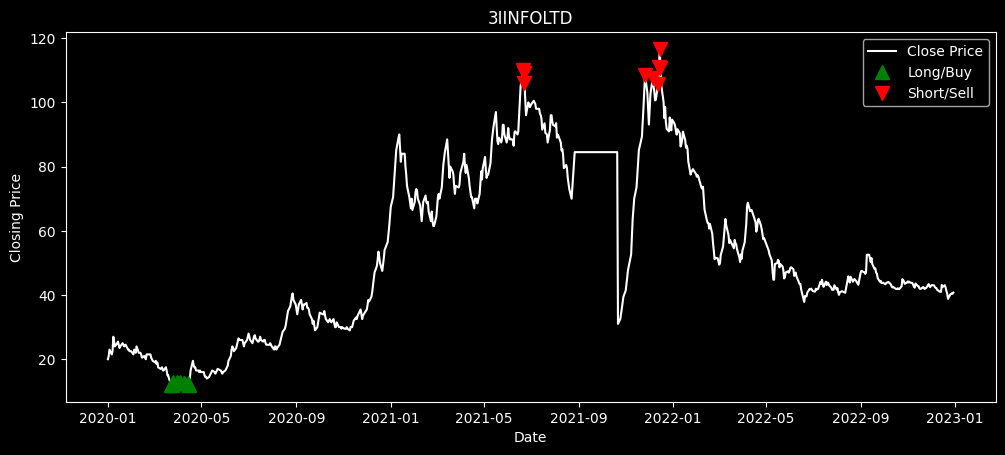

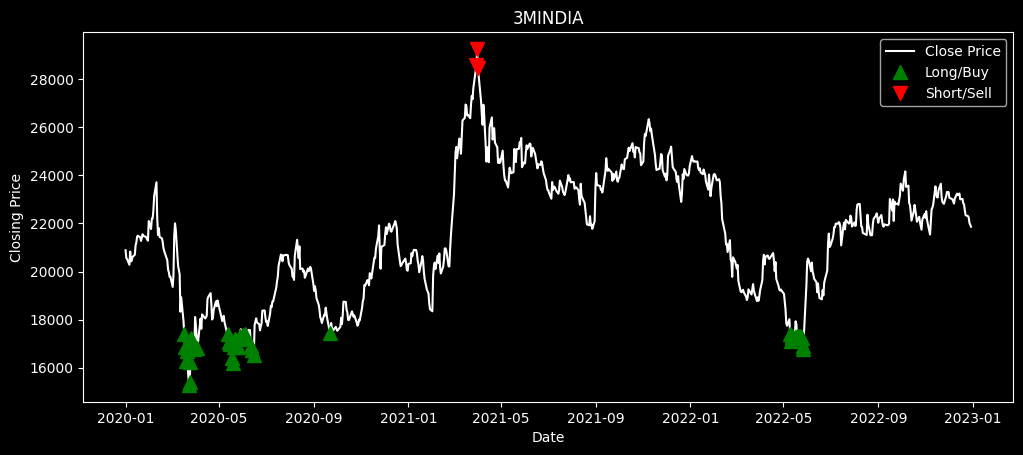

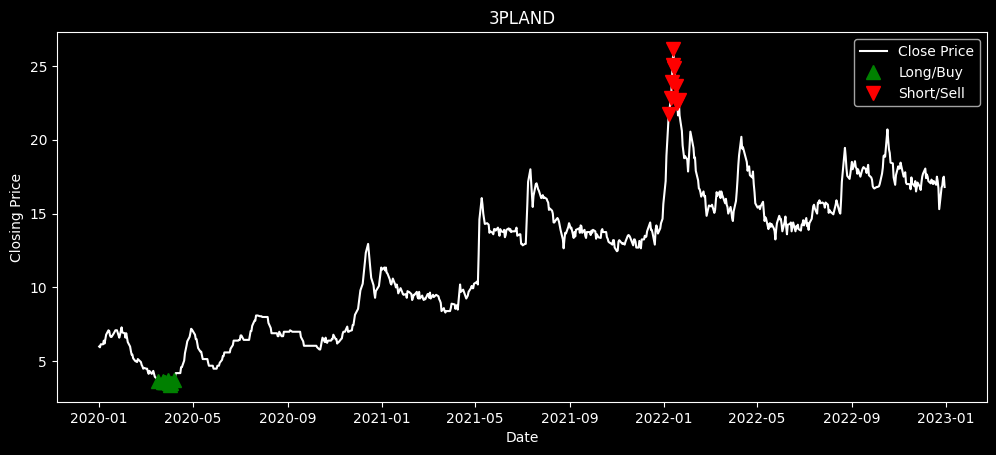

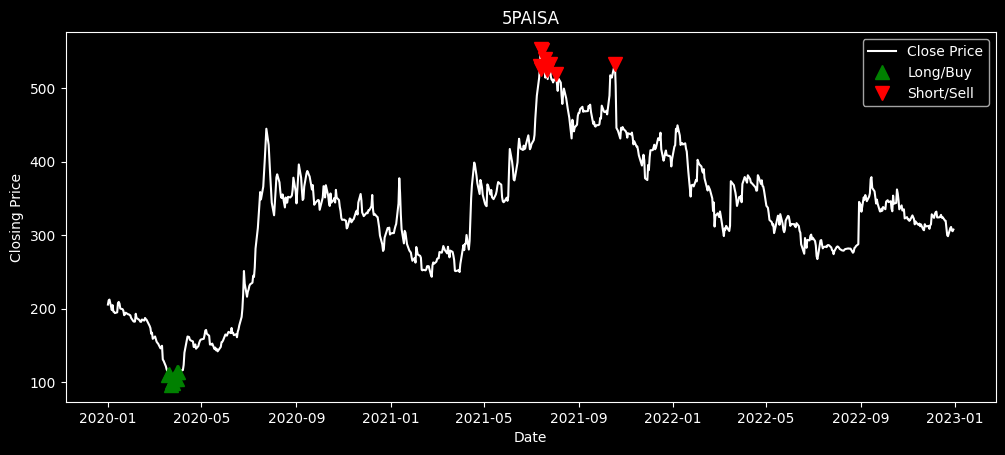

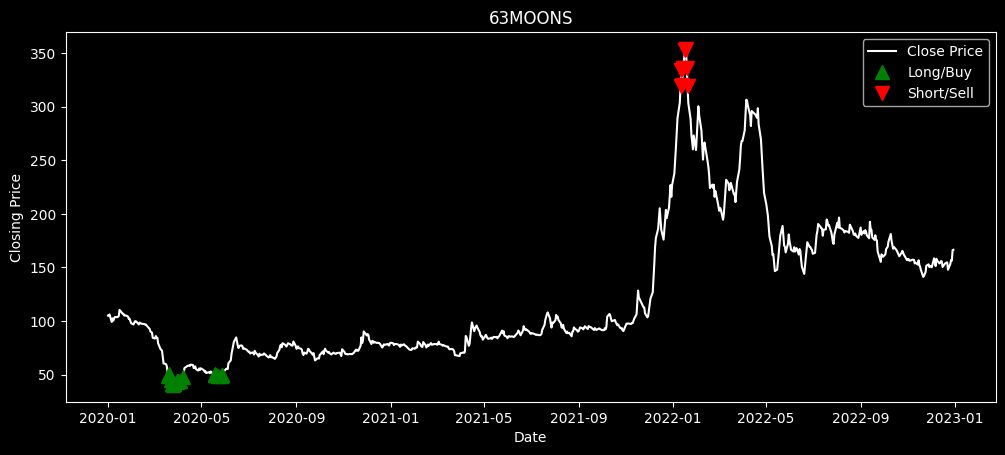

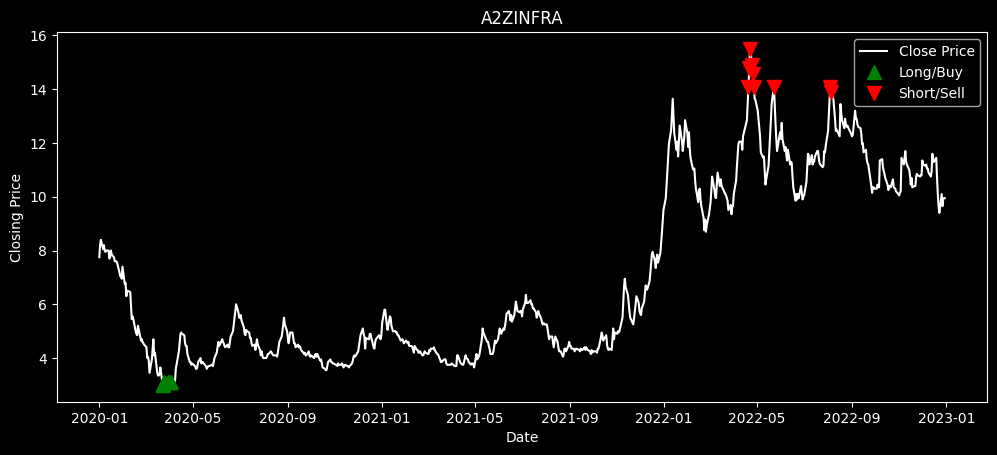

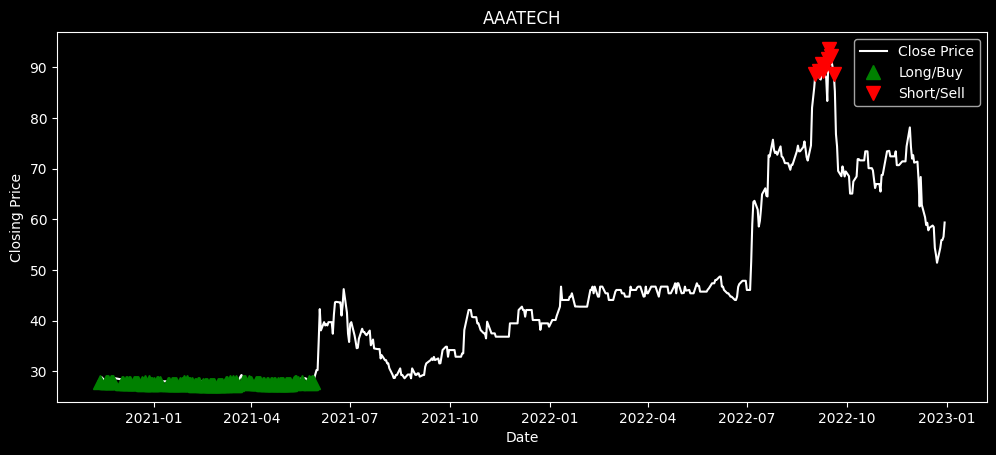

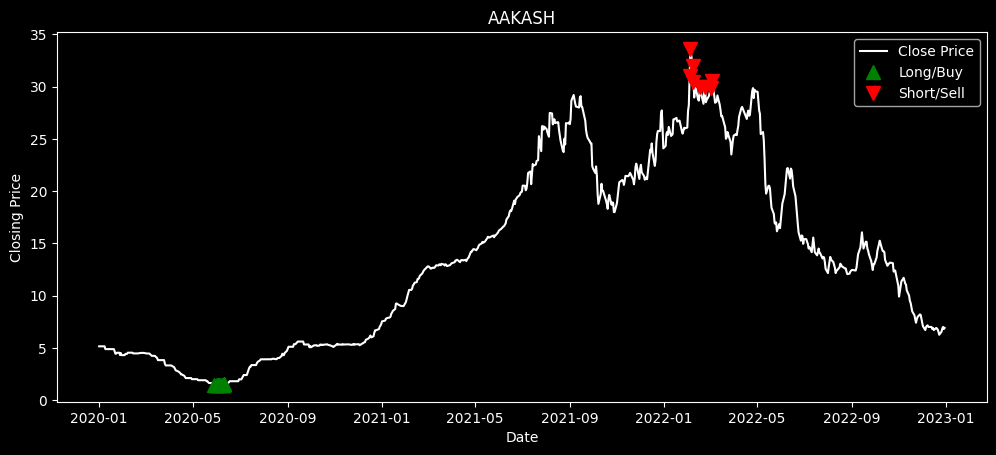

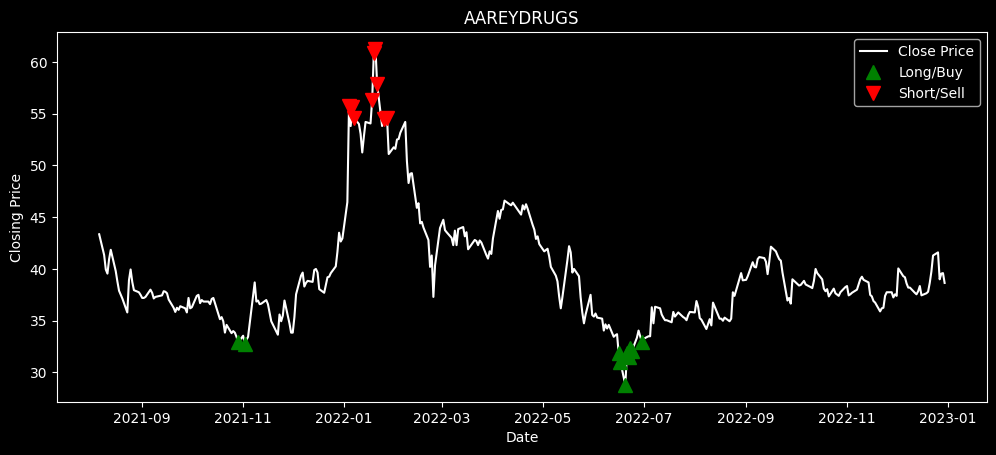

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

tickers=["20MICRONS", "21STCENMGM", "360ONE", "3IINFOLTD", "3MINDIA", "3PLAND", "5PAISA", "63MOONS", "A2ZINFRA", "AAATECH", "AAKASH", "AAREYDRUGS"]

def signals_generator(tickers, num_of_signals):
    yf.pdr_override()
    plt.style.use('dark_background')  # dark theme for plot

    results = {}
    for ticker in tickers:
        try:
            df = yf.download(ticker+".NS", start="2020-01-01", end="2023-01-01")  # Specify the date range as needed
            closes = sorted(df.Close.tolist())
            low, high = closes[num_of_signals], closes[-num_of_signals]

            df['Signal'] = 0
            df.loc[df['Adj Close'] > high, 'Signal'] = -1
            df.loc[df['Adj Close'] < low, 'Signal'] = 1

            long = df.loc[df['Signal'] == 1]
            short = df.loc[df['Signal'] == -1]

            fig = plt.figure()
            fig.set_figwidth(12)
            plt.plot(df.index, df['Adj Close'], color='white', label='Close Price')
            plt.plot(long.index, df.loc[long.index]['Adj Close'], '^', markersize=10, color='g', label='Long/Buy')
            plt.plot(short.index, df.loc[short.index]['Adj Close'], 'v', markersize=10, color='r', label='Short/Sell')
            plt.ylabel('Closing Price')
            plt.xlabel('Date')
            plt.title(ticker)
            plt.legend(loc='best')

            results[ticker] = fig  # Store the figure for each ticker
        except Exception as e:
            print(f"Error processing {ticker}: {e}")
            continue

    return results


num_of_signals = 10
signal_plots = signals_generator(tickers, num_of_signals)

# Display plots
for ticker, fig in signal_plots.items():
    fig.show()


In [5]:
import yfinance as yf
import pandas as pd
import math

def financials_extractor(ticker):
    result = {}
    try:
        yf_obj = yf.Ticker(ticker+'.NS')
        info = yf_obj.info

        result['ticker'] = ticker
        result['bookValue'] = round(info.get('bookValue', 0), 2)
        result['priceToBook'] = round(info.get('priceToBook', 0), 2)
        result['trailingEPS'] = info.get('trailingEps', 0)
        result['priceToSales'] = round(info.get('priceToSalesTrailing12Months', 0), 2)
        result['priceToEarnings'] = round(info.get('forwardPE', 0), 2)
        result['close'] = info.get('previousClose', 0)
    except Exception as e:
        print(f"Error extracting financials for {ticker}: {e}")

    return result

def valuation_determiner(ticker):
    data = financials_extractor(ticker)
    if not data:
        return None

    ltp = float(data['close'])
    pricetobook = float(data['priceToBook'])
    pricetosales = float(data['priceToSales'])
    trailing_EPS = float(data['trailingEPS'])
    book_value = float(data['bookValue'])

    valuation_result = {
        'ticker': ticker,
        'VAP_BV': 0,
        'VAP_SALES': 0,
        'VAP_GRAHAM': 0,
        'VAP_EARNINGS': 0,
        'LTP': ltp,
    }

    if pricetobook != 0:
        valuation_result['VAP_BV'] = ltp + ((ltp * ((1.8 - pricetobook) / pricetobook) * 100) / 100) if pricetobook < 1.8 else ltp - ((ltp * ((pricetobook - 1.8) / pricetobook) * 100) / 100)
    if pricetosales != 0:
        valuation_result['VAP_SALES'] = ltp + ((ltp * ((1.5 - pricetosales) / pricetosales) * 100) / 100) if pricetosales < 1.5 else ltp - ((ltp * ((pricetosales - 1.5) / pricetosales) * 100) / 100)
    if trailing_EPS > 0 and book_value > 0:
        valuation_result['VAP_GRAHAM'] = math.sqrt(22.5 * trailing_EPS * book_value)
    if trailing_EPS > 0:
        valuation_result['VAP_EARNINGS'] = round(16 * trailing_EPS, 2)

    return valuation_result

def sc_earnings(tickers):
    result = []
    for ticker in tickers:
        valuation = valuation_determiner(ticker)
        if valuation and float(valuation['LTP']) < float(valuation['VAP_EARNINGS']):
            result.append(ticker)

    return result

tickers=["20MICRONS", "21STCENMGM", "360ONE", "3IINFOLTD", "3MINDIA", "3PLAND", "5PAISA", "63MOONS", "A2ZINFRA", "AAATECH", "AAKASH", "AAREYDRUGS"]

undervalued_stocks = sc_earnings(tickers)
print(undervalued_stocks)


['20MICRONS', '21STCENMGM', '63MOONS']


In [6]:
import yfinance as yf
import talib
import pandas as pd

# Example tickers list
tickers=["20MICRONS", "21STCENMGM", "360ONE", "3IINFOLTD", "3MINDIA", "3PLAND", "5PAISA", "63MOONS", "A2ZINFRA", "AAATECH", "AAKASH", "AAREYDRUGS"]

def fetch_stock_data(ticker):
    try:
        df = yf.download(ticker, start="2020-01-01", end="2023-01-01")
        return df
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

def ma_above_scanner(tickers, period):
    stocks_over_sma = []
    for ticker in tickers:
        df = fetch_stock_data(ticker)
        if df is not None:
            sma = talib.SMA(df['Close'], timeperiod=period)
            if df['Close'].iloc[-1] > sma.iloc[-1]:
                stocks_over_sma.append(ticker)
    return stocks_over_sma

def ma_below_scanner(tickers, period):
    stocks_below_sma = []
    for ticker in tickers:
        df = fetch_stock_data(ticker)
        if df is not None:
            sma = talib.SMA(df['Close'], timeperiod=period)
            if df['Close'].iloc[-1] < sma.iloc[-1]:
                stocks_below_sma.append(ticker)
    return stocks_below_sma

def price_just_crossed_over_ma(tickers, period):
    stocks_crossed_sma = []
    for ticker in tickers:
        df = fetch_stock_data(ticker)
        if df is not None:
            sma = talib.SMA(df['Close'], timeperiod=period)
            if df['Close'].iloc[-1] > sma.iloc[-1] and df['Close'].iloc[-2] < sma.iloc[-2]:
                stocks_crossed_sma.append(ticker)
    return stocks_crossed_sma

def price_just_crossed_below_ma(tickers, period):
    stocks_crossed_sma = []
    for ticker in tickers:
        df = fetch_stock_data(ticker)
        if df is not None:
            sma = talib.SMA(df['Close'], timeperiod=period)
            if df['Close'].iloc[-1] < sma.iloc[-1] and df['Close'].iloc[-2] > sma.iloc[-2]:
                stocks_crossed_sma.append(ticker)
    return stocks_crossed_sma

# Example usage
period = 200
print("Stocks above SMA:", ma_above_scanner(tickers, period))
print("Stocks below SMA:", ma_below_scanner(tickers, period))
print("Stocks just crossed above SMA:", price_just_crossed_over_ma(tickers, period))
print("Stocks just crossed below SMA:", price_just_crossed_below_ma(tickers, period))

ModuleNotFoundError: No module named 'talib'